In [1]:
# Importing libreries : 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from typing import List
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Step1 : Load and Familiarizing with Data

## a: Loading DataSet

In [2]:
def load_csv(filename):
    return pd.read_csv(f'/kaggle/input/competitive-data-science-predict-future-sales/{filename}.csv')

# Load the CSV files using the function
data_items = load_csv('items')
data_sample_submissions = load_csv('sample_submission')
data_item_categories = load_csv('item_categories')
data_sales = load_csv('sales_train')
data_shops = load_csv('shops')
data_test = load_csv('test')

## b : Familiarizing with Data

### Items

In [3]:
data_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
data_items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [5]:
data_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


### sample_submission

In [6]:
data_sample_submissions.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [7]:
data_sample_submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


### item_categories

In [8]:
data_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
data_item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


### sales_train

In [10]:
data_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
data_sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [12]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


## Shops

In [13]:
data_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
data_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### Test

In [15]:
data_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [16]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


# Step 2: Initial Data Profiling 

* ## a : checking Missing value
* ## b : checking Duplicate
* ## c : checking Outlier

##

## checking Missing value¶

* List of Data set which needs to be check = [data_items , data_item_categories , data_sales , data_shops ]

---> And why we did not consider sample and test ? Because sample has been created for just purpose of example and test is for testing the resualt so missing value would be meaningfull.

In [17]:
# Using msno matrix for showing missing value distribution 
List_dataset_missingval_check = [data_items , data_item_categories , data_sales , data_shops]

for df  in List_dataset_missingval_check:
    dict_missing_value =df.isnull().sum().to_dict()
    
    print(dict_missing_value)

{'item_name': 0, 'item_id': 0, 'item_category_id': 0}
{'item_category_name': 0, 'item_category_id': 0}
{'date': 0, 'date_block_num': 0, 'shop_id': 0, 'item_id': 0, 'item_price': 0, 'item_cnt_day': 0}
{'shop_name': 0, 'shop_id': 0}


**As we can see there are no missing value in dataset above ( before merging )**

* ## b : checking Duplicate

In [18]:
# Making list of data and name
List_name_dfs =['items',
'sample_submission',
'item_categories',
'sales_train',
'shops',
'test']

List_dfs = [data_items,
data_sample_submissions,
data_item_categories,
data_sales,
data_shops,
data_test]

In [19]:
# Defining function for Summarize duplicate information : 

def check_duplicate(DF_LST : List[pd.DataFrame], Name_lST : List [str]) -> pd.DataFrame : 
    summary = {}
    
    for df , index in zip(DF_LST , Name_lST):
        num_duplicated = df.duplicated().sum()
        summary[index]= num_duplicated
    
    dup_sum = pd.DataFrame.from_dict(summary ,orient= 'index')   
    return dup_sum

In [20]:
check_duplicate(List_dfs , List_name_dfs)

,0
items,0
sample_submission,0
item_categories,0
sales_train,6
shops,0
test,0


In [21]:
data_sales[data_sales.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


**There is no duplicate data in different dataset excecpt sales train we have 6 duplicated rows**
> ***I think since data of duplicated data are different and even there shop id are different , we don't need to delete duplicated [because they are specific ]***

* ## c : checking Outlier 

>**In this section we are going  to analyze distribution of numeric value and check outlier**

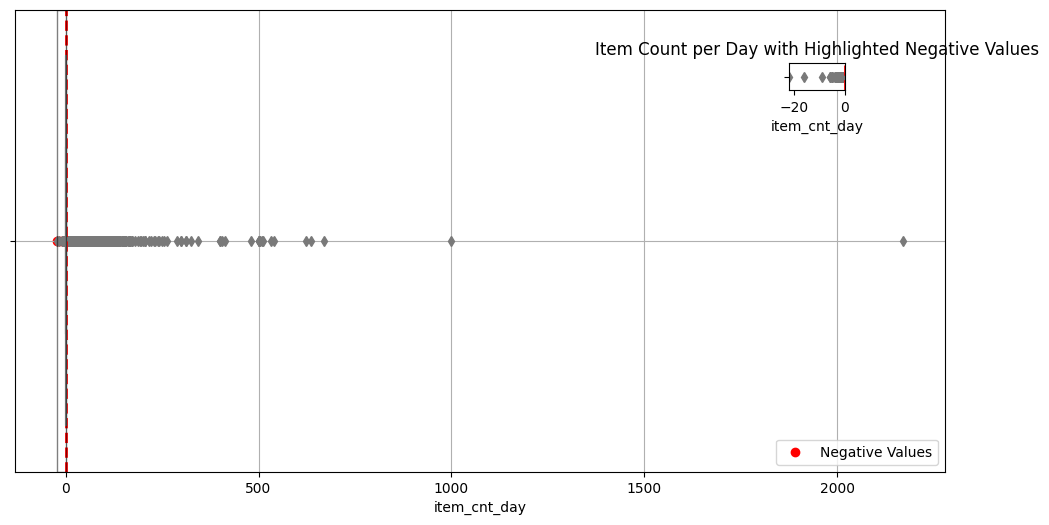

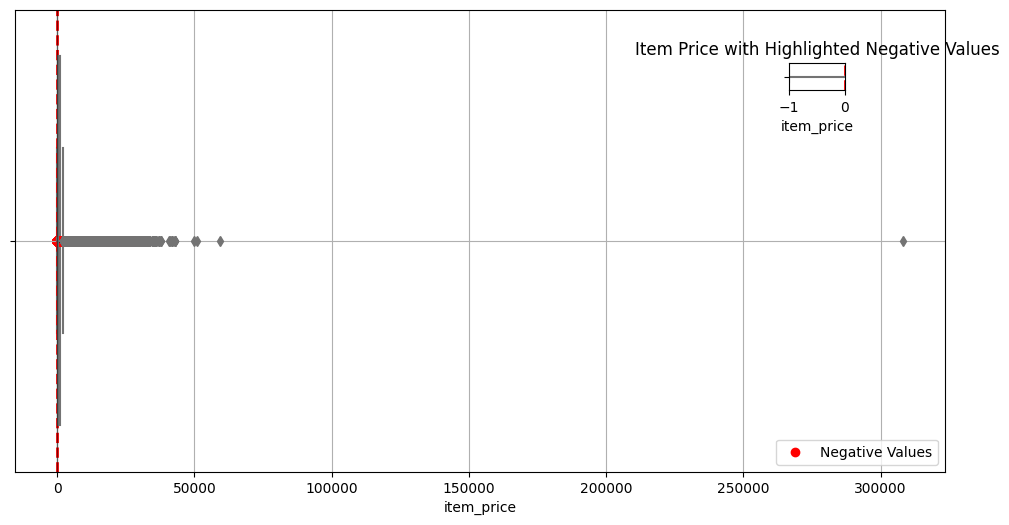

In [22]:



# Create a mask for negative values
mask_neg_price = data_sales.item_price < 0
mask_neg_count = data_sales.item_cnt_day < 0

# Define the zoom region for negative values
def plot_with_zoom(ax, data, mask, xlabel, title, color):
    # Plot main figure
    sns.boxplot(x=data, color=color, ax=ax)
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2)  # Vertical line at zero
    
    # Plot Negative point with different color :
    
    negative_counts = data[mask_neg_count]
    ax.scatter(negative_counts, np.zeros_like(negative_counts), color='red', label='Negative Values')
    ax.legend(loc ='lower right')
    ax.grid(True)
    
    # Create inset
    zoom_region = [data[mask].min(), 0]  # Define the zoom region for negative values
    axins = inset_axes(ax, width="30%", height="30%", loc='upper right', bbox_to_anchor=(0.7, 0.7, 0.2, 0.2), bbox_transform=ax.transAxes)
    
    # Plot in the inset
    sns.boxplot(x=data, color=color, ax=axins)
    axins.axvline(x=0, color='red', linestyle='--', linewidth=2)
    axins.set_xlim(zoom_region)  # Set x-axis limits to zoom in on the negative values
    axins.set_ylim(-0.5, 0.5)  # Adjust y-axis limits to ensure visibility
    
    # Indicate zoom region on the main plot
    ax.indicate_inset_zoom(axins, edgecolor='black')
    
    return ax, axins

# Plot for item_count_day with zoomed negative values
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax1, ax1ins = plot_with_zoom(ax1, data_sales.item_cnt_day, mask_neg_count, 'Item Count per Day', 'Item Count per Day with Highlighted Negative Values', 'lightblue')
plt.title('Item Count per Day with Highlighted Negative Values')
plt.show()

# Plot for item_price with zoomed negative values
plt.figure(figsize=(12, 6))
ax2 = plt.gca()
ax2, ax2ins = plot_with_zoom(ax2, data_sales.item_price, mask_neg_price, 'Item Price', 'Item Price with Highlighted Negative Values', 'lightgreen')
plt.title('Item Price with Highlighted Negative Values')
plt.show()

In [23]:
data_sales[mask_neg_price]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [24]:
data_sales[mask_neg_count]

print(f'Percentage of negative sale price in whole sale dataframe: {(len(data_sales[mask_neg_price]) / len(data_sales)) * 100:.5f}%')

Percentage of negative sale price in whole sale dataframe: 0.00003%


> **As we can see in graph aboe we can see negative item price and item-cnt per day and I zoomed out on them to understand range and distriution of their value .**

- **Negative Values:** Can indicate refunds, stolen products, breakages, or expired items.
- **Impact:** Distort multiplicative seasonality diagnostics and analysis.
- **Recommendation:** Remove negative values to ensure accuracy and reliability in analysis.(Since amount of them are not so much )

**Checking the index of outlier :**

In [25]:
print(f'The outlier of item_cnt_day will be = {data_sales["item_id"][data_sales["item_cnt_day"] > 500].unique()}')
print(f'The outlier of item_price  will be = {data_sales["item_id"][data_sales["item_price"] > 50000].unique()}')

The outlier of item_cnt_day will be = [ 8057 20949  9242 19437  3731 11373  9249  9248]
The outlier of item_price  will be = [11365  6066 13199]


## Consistency : 

in this section , we are going to check consistency of data format in different data set

In [26]:
def inspect_dtype(DF_LST : List[pd.DataFrame], Name_lST : List [str]) -> pd.DataFrame :
    report  = {}
    for  df_name , df in zip (Name_lST , DF_LST) :
        dtype = df.infer_objects().dtypes.astype('str')
        report[df_name] = dtype
        
        result = pd.DataFrame.from_dict(report, orient ='index').fillna('_')
        
    return result

In [27]:
Consistency_Check =inspect_dtype(List_dfs , List_name_dfs) 
Consistency_Check

,item_name,item_id,item_category_id,ID,item_cnt_month,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day,shop_name
items,object,int64,int64,_,_,_,_,_,_,_,_,_
sales_train,_,int64,_,_,_,_,object,int64,int64,float64,float64,_
test,_,int64,_,int64,_,_,_,_,int64,_,_,_
item_categories,_,_,int64,_,_,object,_,_,_,_,_,_
sample_submission,_,_,_,int64,float64,_,_,_,_,_,_,_
shops,_,_,_,_,_,_,_,_,int64,_,_,object


**In this table we can see  dttype of  differnet column and in different initial data set and we can compare data  type of similar column**

# Check consistency of Date (Time Series ) :

In [28]:
# Converting date from obj -> datetime format : 
from dateutil.parser import isoparse

def check_iso(date_str) :
    
    try :
        isoparse(date_str)
        return True
    except ValueError:
        return False

# Create data frame to check if time is ISO or not  :

df_iso  = pd.DataFrame()

df_iso['is_iso']  = data_sales['date'].apply(check_iso)

df_iso.value_counts()

is_iso
False     2935849
Name: count, dtype: int64

> **None of these  date are in ISO8601 format so it make it  impossible to use format = ISO8601 to convert them to datetime object**

In [29]:
from datetime import datetime

def check_date_format (date_str , date_format = '%d.%m.%Y'):
    
    try:
        datetime.strptime( date_str ,  date_format)
        return True
    except ValueError :
        
        return False
    
    
df_iso['Correct_format'] = data_sales['date'].apply(lambda x : check_date_format(x))

In [30]:
df_iso.value_counts()

is_iso  Correct_format
False   True              2935849
Name: count, dtype: int64

> **Yes all the date time has the  format  '%d.%m.%Y'**

> **So now we can  convert it easily to datetime format**

In [31]:
data_sales['date'] = pd.to_datetime(data_sales['date'],format='%d.%m.%Y' )

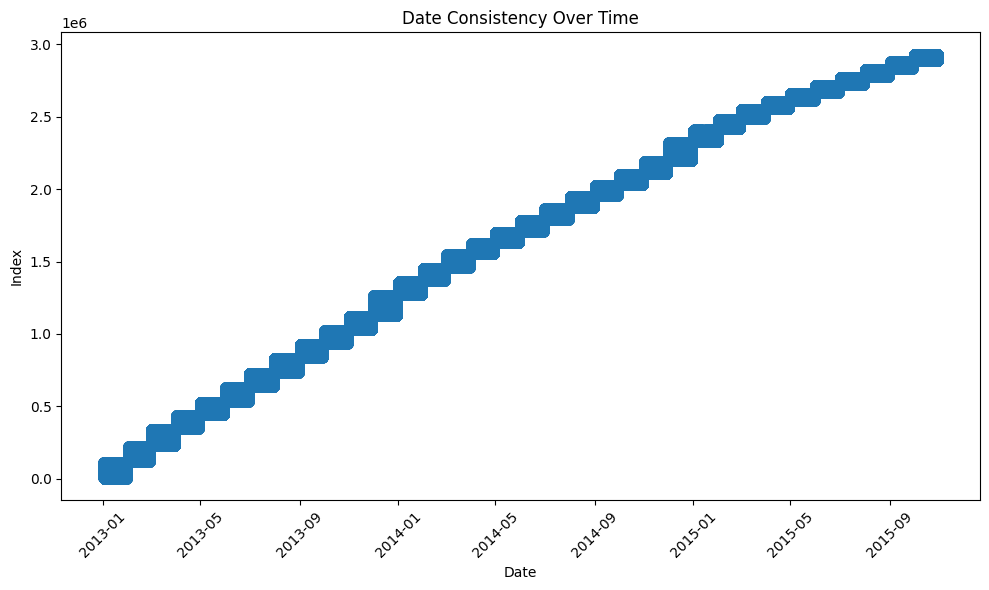

In [32]:
# Check for Frequency of  time_interval : 



data_sales = data_sales.sort_values('date')

plt.figure(figsize=(10, 6))
plt.plot(data_sales['date'], data_sales.index, marker='o', linestyle='-')

plt.title('Date Consistency Over Time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

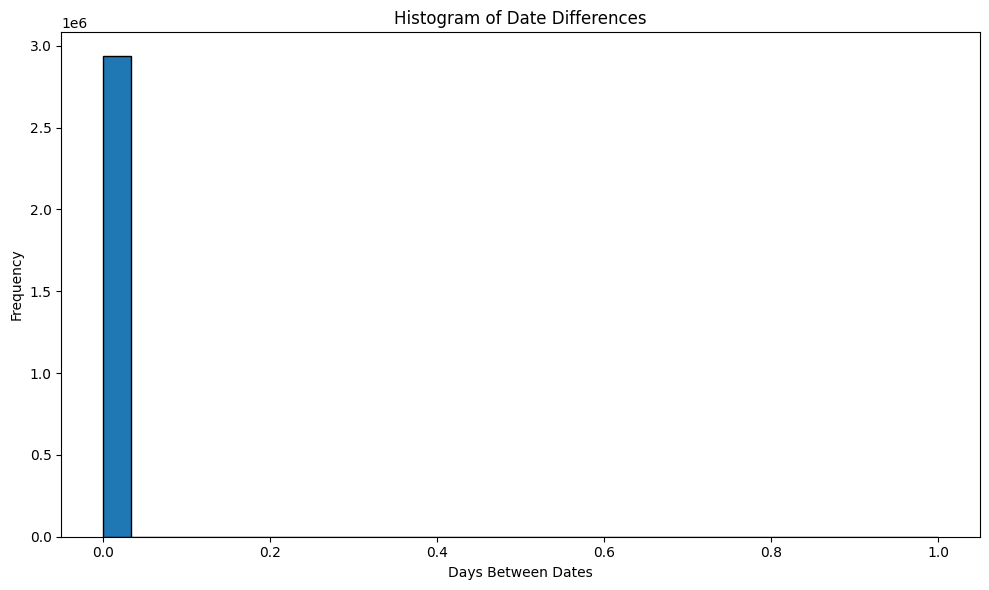

In [33]:
data_sales['date_diff'] = data_sales['date'].diff().dt.days

# Plot the histogram of date differences
plt.figure(figsize=(10, 6))
plt.hist(data_sales['date_diff'].dropna(), bins=30, edgecolor='black')

plt.title('Histogram of Date Differences')
plt.xlabel('Days Between Dates')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

> **As we can see we have  Consistency between date column**

# Categorical data Consistency check  :

## Summary of Datasets inorder to merge : 


### 1. `item_cat` DataFrame:
- `item_cat_name`
- `item_cat_id`

### 2. `item` DataFrame:
- `item_cat_name`
- `item_cat_id`

### 3. `sale` DataFrame:
- `shop_id`
- `item_id`

### 4. `shop` DataFrame:
- `shop_id`
- `shop_name`

### 5. `test set` DataFrame:
- `shop_id`
- `item_id`

Each dataset contains columns that can be used for merging:
- `item_cat_id` in both `item_cat` and `item`
- `shop_id` in both `sale` and `shop`

In [34]:
merged_item_itemcat = pd.merge(data_item_categories ,  data_items , on ='item_category_id' ,how ='outer',indicator= True)
merged_item_itemcat

,item_category_name,item_category_id,item_name,item_id,_merge
0,PC - Гарнитуры/Наушники,0,PC: Гарнитура HyperX Cloud Core игровая стерео...,5441,both
1,PC - Гарнитуры/Наушники,0,Наушники PHILIPS SBC HC8680,16255,both
2,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-120,16256,both
3,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-124 Black,16257,both
4,Аксессуары - PS2,1,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb...,5606,both
...,...,...,...,...,...
22165,Элементы питания,83,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,both
22166,Элементы питания,83,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,both
22167,Элементы питания,83,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,both
22168,Элементы питания,83,Элемент питания КОСМОС LR03 2*BL,22098,both


In [35]:
merged_item_itemcat['_merge'].value_counts()

_merge
both          22170
left_only         0
right_only        0
Name: count, dtype: int64

> **As we can see all item_cat_id and item_cat_name in those dataframe match each other**

In [36]:
# Delete _merge column in order to use indicator in merging next data frame :

merged_item_itemcat.drop('_merge' ,axis= 1, inplace =True )

In [37]:
sale_item_cat_merged = pd.merge(merged_item_itemcat , data_sales ,
                               on ='item_id',how ='outer' , indicator= True)
sale_item_cat_merged

,item_category_name,item_category_id,item_name,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,date_diff,_merge
0,Кино - DVD,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,2014-09-01,20.0,54.0,58.0,1.0,0.0,both
1,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-04-02,15.0,55.0,4490.0,1.0,0.0,both
2,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-04-04,15.0,55.0,4490.0,1.0,0.0,both
3,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-07-06,18.0,55.0,4490.0,1.0,0.0,both
4,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-08-04,19.0,55.0,4490.0,1.0,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...
2936207,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-02-02,1.0,42.0,799.0,1.0,0.0,both
2936208,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-02-17,1.0,16.0,799.0,1.0,0.0,both
2936209,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-03-08,2.0,43.0,798.5,1.0,0.0,both
2936210,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-09-13,8.0,12.0,799.0,1.0,0.0,both


In [38]:
# check for  which item_id we don't have corrosponding item_cat_name and item_cat_id :

sale_item_cat_merged['_merge'].value_counts()

_merge
both          2935849
left_only         363
right_only          0
Name: count, dtype: int64

> **As we can see for 363 items in merged dataframe of item and item_cat we don't have information in Sale data frame** 
> **Which it means that this category id and name has just been mentioned in those dataframes but there is not corresponding in Sale data frame**

In [39]:
sale_item_cat_merged[sale_item_cat_merged['_merge'] == 'left_only'][['item_category_name','item_category_id']].nunique().sum()

78

In [40]:
merged_item_itemcat[['item_category_name','item_category_id']].nunique().sum()

168

In [41]:
168-78

90

> ***It seems that 90 Category is missing in between item category and it merged with sale data***

### Checking test-set shop_id and item_id :

> ***We'll check if the shop_id , item_id are in train_set also or not***

In [42]:
train_shop_item = data_sales[['item_id', 'shop_id']]
test_shop_item = data_test[['item_id', 'shop_id']]


set_1= set(train_shop_item['item_id'])
set_2 = set(test_shop_item['item_id'])

len(set_2 - set_1)

363

> ***As we can see there are 363 item id which is exist in test data but we don't have them in training***

In [43]:

set_1= set(train_shop_item['shop_id'])
set_2 = set(test_shop_item['shop_id'])

len(set_2 - set_1)

0

> ***Seaking about shop id , we don't have this problem***

# Validity 

**In this validate if data are in validated range or  not .**

In [44]:
def  check_df_validity (df : pd.DataFrame) :
    
    """
    This function will analyze validity of numeric value with IQR method and return outlier in data frame and index of outlier as obj
    """
    
    numeric_cols = (df.select_dtypes( exclude= ['object']).columns).values.tolist()
    print(numeric_cols)
    
    outlier_index = {}
    
    for col in numeric_cols :
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5 * IQR
        
        condition_outlier = np.logical_or(df[col]< lower_bound , df[col]> upper_bound)
        outlier = df[col][condition_outlier]
        
        percentage_of_outlier = len(outlier) / len(df[col])
        
        print(f'for column {col} , the {percentage_of_outlier:.3f} is our outlier and data frame below reperesent it {outlier} \n')
        
        outlier_index[col] = outlier.index
        
    return outlier_index

In [45]:
check_df_validity(data_sales)

['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'date_diff']
for column date , the 0.000 is our outlier and data frame below reperesent it Series([], Name: date, dtype: datetime64[ns]) 

for column date_block_num , the 0.000 is our outlier and data frame below reperesent it Series([], Name: date_block_num, dtype: int64) 

for column shop_id , the 0.000 is our outlier and data frame below reperesent it Series([], Name: shop_id, dtype: int64) 

for column item_id , the 0.000 is our outlier and data frame below reperesent it Series([], Name: item_id, dtype: int64) 

for column item_price , the 0.088 is our outlier and data frame below reperesent it 49800       2500.0
85870      11489.7
82322       2199.0
92668       4989.0
23817       2799.0
            ...   
2916290     3999.0
2916351     2499.0
2887237     5999.0
2900730     2199.0
2928850     3199.0
Name: item_price, Length: 258942, dtype: float64 

for column item_cnt_day , the 0.104 is our outlier and 

{'date': Index([], dtype='int64'),
 'date_block_num': Index([], dtype='int64'),
 'shop_id': Index([], dtype='int64'),
 'item_id': Index([], dtype='int64'),
 'item_price': Index([  49800,   85870,   82322,   92668,   23817,   15532,   49622,   35552,
          29610,   29617,
        ...
        2915929, 2900487, 2900465, 2900463, 2916235, 2916290, 2916351, 2887237,
        2900730, 2928850],
       dtype='int64', length=258942),
 'item_cnt_day': Index([  29791,   10621,   85836,   15858,   29977,   29979,   76658,   49083,
         115268,   85676,
        ...
        2899722, 2899840, 2899902, 2916446, 2933594, 2900779, 2900767, 2900924,
        2915956, 2885119],
       dtype='int64', length=306477),
 'date_diff': Index([  75028,   27609,   22937,   46033,   42752,  106116,   39881,   43082,
          46068,   87063,
        ...
        2894865, 2892317, 2923361, 2885124, 2900492, 2908252, 2932192, 2898885,
        2905819, 2882989],
       dtype='int64', length=1033)}

**> As we can see we have outlier in  item_price 0.088  and item_cnt_day  0.104**
> I used  this  function just for data_sales because for other data frame , we had item id , shop id and other kind of id and categorical data which doesn't give us much information . because id are specific and we can not perform IQR on categorical value

# Performing ETL : 

In [51]:
# Defining class for ETL  
import os
import pandas as pd

class ETLPipeline:
    def __init__(self, source_file, target_file):
        self.source_file = source_file
        self.target_file = target_file


    def extract_data(self):
        dataframes = {}  # Dictionary to store DataFrames with file names (without extensions) as keys

        for dirname, _, filenames in os.walk(self.source_file):
            for filename in filenames:
                file_path = os.path.join(dirname, filename)
                name, ext = os.path.splitext(filename)  # Get the file name without extension

                try:
                    # Read the file into a DataFrame 
                    df = pd.read_csv(file_path)
                    dataframes[name] = df  # Use the file name (without extension) as the key
                except Exception as e:
                    print(f"Failed to read {file_path}: {e}")
    
        return dataframes

    def transform_data(self, data: dict):
        
    # Removing outlier price and item count per day (based on logic has been mentioen in DQC)
    
        for key in data.keys():
            if key == 'sales_train':
                # Create a mask for negative values
                mask_neg_price = data[key].item_price < 0
                mask_neg_count = data[key].item_cnt_day < 0
                
                combined_mask = mask_neg_price | mask_neg_count
                data[key] = data[key][~ combined_mask]
                
    # Merge datasets
        merged_df = pd.merge(data['sales_train'], data['items'], on='item_id', how='left')
        merged_df = pd.merge(merged_df, data['item_categories'], on='item_category_id', how='left')
        merged_df = pd.merge(merged_df, data['shops'], on='shop_id', how='left')

        
                
   # Converting date -> datatime and creat new feature [month , year]
    
    
        merged_df['date'] = pd.to_datetime(merged_df['date'],format='%d.%m.%Y')
        
        merged_df['month'] = merged_df['date'].dt.month
        merged_df['year'] = merged_df['date'].dt.year


        return merged_df

    def load_data(self, data):
        # Code to load the transformed data into the target
        data.to_csv(self.target_file, index=False)

    def run(self):
        extracted_data = self.extract_data()
        transformed_data = self.transform_data(extracted_data)
        self.load_data(transformed_data)



In [52]:
# Example usage:
pipeline = ETLPipeline('/kaggle/input', "transformed_data.csv")
pipeline.run()

In [53]:
transformed_data = pd.read_csv('/kaggle/working/transformed_data.csv')

In [54]:
transformed_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,month,year
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,2013
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
2,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
3,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",1,2013
4,2013-01-10,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум""",1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-10,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",10,2015
2928488,2015-10-09,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",10,2015
2928489,2015-10-14,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",10,2015
2928490,2015-10-22,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум""",10,2015
